In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.inspection import DecisionBoundaryDisplay


In [8]:
explanatory = pd.read_csv("trump/explanatory.csv")
explanatory_NOGISJOIN = explanatory.drop('GISJOIN', axis = 1)
explanatory_NOGISJOIN

,race_white,race_black,race_hispanic,sex_female,age_0_17,age_over65,ind_divorce,marriage_never_married,lang_second_eng,empl_civilian_unemployed,...,transp_public,pov_under_1,insured_under65,house_vacant,housevalue_median,POP16dens,MEDIAN_INCOME08_16,POP08_16,edu_high,housevalue_IQR
0,0.756835,0.183709,0.025723,0.511762,0.251649,0.139785,0.196471,0.248933,0.041779,0.033644,...,0.000782,0.122660,0.896521,0.084265,141000.0,35.167013,-0.012534,0.008408,0.245928,136300.0
1,0.831788,0.092256,0.043667,0.511949,0.221894,0.187149,0.231375,0.246486,0.069489,0.036725,...,0.002143,0.129938,0.856273,0.301453,173400.0,47.226343,0.012996,0.088874,0.295471,157800.0
2,0.458856,0.478883,0.043098,0.464981,0.215488,0.165289,0.281972,0.345559,0.060732,0.061604,...,0.003871,0.263737,0.842386,0.227080,90300.0,11.360474,0.064819,-0.031126,0.128678,116300.0
3,0.747652,0.212121,0.022240,0.464646,0.210704,0.148857,0.231938,0.296369,0.023695,0.034764,...,0.004831,0.164539,0.892983,0.214445,97200.0,13.918126,0.080165,-0.008652,0.120000,112300.0
4,0.876577,0.015580,0.087273,0.504852,0.235703,0.171929,0.182036,0.198090,0.068917,0.029713,...,0.001733,0.165344,0.867668,0.135472,124200.0,34.243279,0.022570,0.004142,0.130498,119800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,0.798157,0.008658,0.158596,0.478242,0.275462,0.094171,0.246839,0.262257,0.113228,0.036731,...,0.023499,0.110221,0.855623,0.134489,190700.0,1.649198,-0.054145,0.021007,0.213715,161100.0
3131,0.812005,0.006144,0.151748,0.480971,0.194979,0.118375,0.199402,0.352532,0.168377,0.016622,...,0.062678,0.073255,0.837786,0.354800,720000.0,2.071644,0.095248,0.060818,0.537884,773200.0
3132,0.877184,0.001867,0.089599,0.493275,0.295601,0.106782,0.233039,0.230362,0.107374,0.042407,...,0.034042,0.167586,0.824941,0.152372,179500.0,3.863166,-0.107027,-0.002340,0.182069,141800.0
3133,0.823973,0.007903,0.139624,0.513591,0.248114,0.196503,0.264607,0.195870,0.126539,0.046222,...,0.000275,0.146562,0.791914,0.083443,156900.0,1.437702,0.038029,-0.008783,0.210761,147800.0


In [9]:
explained = pd.read_csv("trump/explained.csv")
explained_NOGISJOIN = np.ravel(explained.drop('GISJOIN', axis = 1))
explained_NOGISJOIN

array([0.49478934, 0.57786162, 0.05611165, ..., 0.61492611, 0.64037685,
       0.78104379])

In [10]:
X_train,X_test,y_train,y_test = train_test_split(explanatory_NOGISJOIN,explained_NOGISJOIN)

In [11]:
model_svr = SVR()
model_svr.fit(X_train, y_train)
pred_svr_test = model_svr.predict(X_test)
pred_svr_train = model_svr.predict(X_train)
mae_train = mean_absolute_error(y_train, pred_svr_train)
mae_test = mean_absolute_error(y_test, pred_svr_test)
print(f"MAE on Training Set: {mae_train:.2f}")
print(f"MAE on Test Set: {mae_test:.2f}")

MAE on Training Set: 0.20
MAE on Test Set: 0.20


PermutationExplainer explainer: 785it [18:42,  1.44s/it]                           


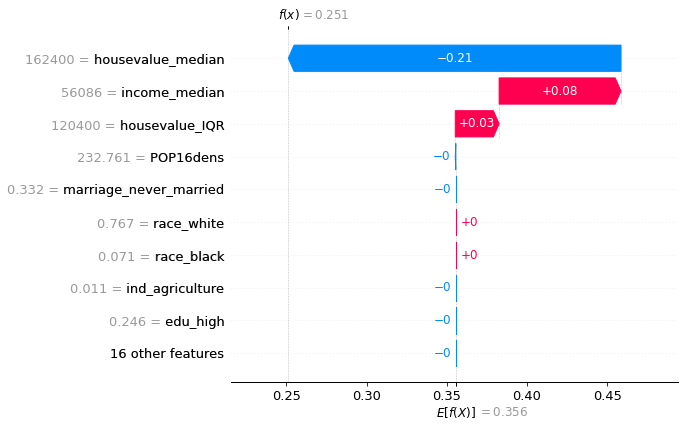

In [6]:
explainer = shap.explainers.Permutation(model_svr.predict, X_train)
shap_values = explainer(X_test, max_evals=51, error_bounds=True)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
shap.plots.waterfall(shap_values[0])


In [7]:
trained = permutation_importance(model_svr, X_train, y_train, n_repeats=30,random_state=0)
tested = permutation_importance(model_svr, X_test, y_test, n_repeats=30,random_state=0)
importance_df = pd.DataFrame(zip(trained['importances_mean'], tested['importances_mean']), index=X_train.columns, columns=["train", "test"])
importance_df_sorted = importance_df.sort_values(by='test', ascending=False)
importance_df_sorted

,train,test
housevalue_median,1.162915e+00,1.242812e+00
income_median,2.202656e-01,2.242903e-01
housevalue_IQR,1.700854e-01,1.954612e-01
POP16dens,1.317574e-03,8.220211e-04
race_white,3.701016e-09,4.004008e-09
race_black,1.881117e-09,1.649873e-09
marriage_never_married,5.396199e-10,5.742466e-10
lang_second_eng,2.283480e-10,3.165996e-10
race_hispanic,1.074519e-10,1.799847e-10
public_asist,1.147921e-10,1.184700e-10


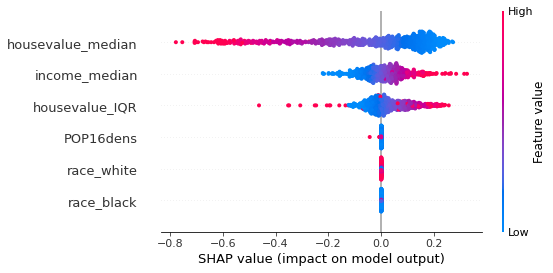

In [10]:
#The x-axis represents the Shapley values. Positive values push the model's output higher, while negative values push it lower.
#Features with consistently long bars contribute more to pushing the model's output in a certain direction.

top_features = importance_df_sorted.head(6).index

# Convert feature names to column indices
top_feature_indices = [X_test.columns.get_loc(feature) for feature in top_features]

# Extract the Shapley values corresponding to the top features
shap_values_top_features = shap_values[:, top_feature_indices]

# Create a summary plot for the top features
shap.summary_plot(shap_values_top_features, X_test.iloc[:, top_feature_indices])


In [4]:
waterfall_X = pd.read_csv("trump.csv")
columns_drop = ['GISJOIN','county_code', 'FIPS', 'YEAR', 'STATE', 'STATEA', 'NAME', 'election_per_dem', 'election_per_gop', 'election_total_votes', 'election_votes_gop', 'election_votes_dem', 'RUCC_2013', 'COUNTYA']
waterfall_X_dropped = waterfall_X.drop(columns=columns_drop,  axis = 1)
waterfall_X_dropped

,COUNTY,race_white,race_black,race_hispanic,sex_female,age_0_17,age_over65,ind_divorce,marriage_never_married,lang_second_eng,...,transp_public,pov_under_1,insured_under65,house_vacant,housevalue_median,POP16dens,MEDIAN_INCOME08_16,POP08_16,edu_high,housevalue_IQR
0,Autauga County,0.756835,0.183709,0.025723,0.511762,0.251649,0.139785,0.196471,0.248933,0.041779,...,0.000782,0.122660,0.896521,0.084265,141000.0,35.167013,-0.012534,0.008408,0.245928,136300.0
1,Baldwin County,0.831788,0.092256,0.043667,0.511949,0.221894,0.187149,0.231375,0.246486,0.069489,...,0.002143,0.129938,0.856273,0.301453,173400.0,47.226343,0.012996,0.088874,0.295471,157800.0
2,Barbour County,0.458856,0.478883,0.043098,0.464981,0.215488,0.165289,0.281972,0.345559,0.060732,...,0.003871,0.263737,0.842386,0.227080,90300.0,11.360474,0.064819,-0.031126,0.128678,116300.0
3,Bibb County,0.747652,0.212121,0.022240,0.464646,0.210704,0.148857,0.231938,0.296369,0.023695,...,0.004831,0.164539,0.892983,0.214445,97200.0,13.918126,0.080165,-0.008652,0.120000,112300.0
4,Blount County,0.876577,0.015580,0.087273,0.504852,0.235703,0.171929,0.182036,0.198090,0.068917,...,0.001733,0.165344,0.867668,0.135472,124200.0,34.243279,0.022570,0.004142,0.130498,119800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Sweetwater County,0.798157,0.008658,0.158596,0.478242,0.275462,0.094171,0.246839,0.262257,0.113228,...,0.023499,0.110221,0.855623,0.134489,190700.0,1.649198,-0.054145,0.021007,0.213715,161100.0
3138,Teton County,0.812005,0.006144,0.151748,0.480971,0.194979,0.118375,0.199402,0.352532,0.168377,...,0.062678,0.073255,0.837786,0.354800,720000.0,2.071644,0.095248,0.060818,0.537884,773200.0
3139,Uinta County,0.877184,0.001867,0.089599,0.493275,0.295601,0.106782,0.233039,0.230362,0.107374,...,0.034042,0.167586,0.824941,0.152372,179500.0,3.863166,-0.107027,-0.002340,0.182069,141800.0
3140,Washakie County,0.823973,0.007903,0.139624,0.513591,0.248114,0.196503,0.264607,0.195870,0.126539,...,0.000275,0.146562,0.791914,0.083443,156900.0,1.437702,0.038029,-0.008783,0.210761,147800.0


In [5]:
counties_df = waterfall_X_dropped.tail(6)
counties_df

,COUNTY,race_white,race_black,race_hispanic,sex_female,age_0_17,age_over65,ind_divorce,marriage_never_married,lang_second_eng,...,transp_public,pov_under_1,insured_under65,house_vacant,housevalue_median,POP16dens,MEDIAN_INCOME08_16,POP08_16,edu_high,housevalue_IQR
3136,Sublette County,0.916467,0.000000,0.078150,0.469498,0.241029,0.133373,0.312155,0.236028,0.056197,...,0.003713,0.077624,0.841213,0.453320,264700.0,0.784775,-0.047282,-0.003279,0.243549,169200.0
3137,Sweetwater County,0.798157,0.008658,0.158596,0.478242,0.275462,0.094171,0.246839,0.262257,0.113228,...,0.023499,0.110221,0.855623,0.134489,190700.0,1.649198,-0.054145,0.021007,0.213715,161100.0
3138,Teton County,0.812005,0.006144,0.151748,0.480971,0.194979,0.118375,0.199402,0.352532,0.168377,...,0.062678,0.073255,0.837786,0.354800,720000.0,2.071644,0.095248,0.060818,0.537884,773200.0
3139,Uinta County,0.877184,0.001867,0.089599,0.493275,0.295601,0.106782,0.233039,0.230362,0.107374,...,0.034042,0.167586,0.824941,0.152372,179500.0,3.863166,-0.107027,-0.002340,0.182069,141800.0
3140,Washakie County,0.823973,0.007903,0.139624,0.513591,0.248114,0.196503,0.264607,0.195870,0.126539,...,0.000275,0.146562,0.791914,0.083443,156900.0,1.437702,0.038029,-0.008783,0.210761,147800.0
3141,Weston County,0.922230,0.002509,0.010035,0.479582,0.210592,0.183554,0.163885,0.183299,0.034461,...,0.074280,0.146942,0.825838,0.104059,172300.0,1.154274,0.034162,0.003216,0.188067,169400.0


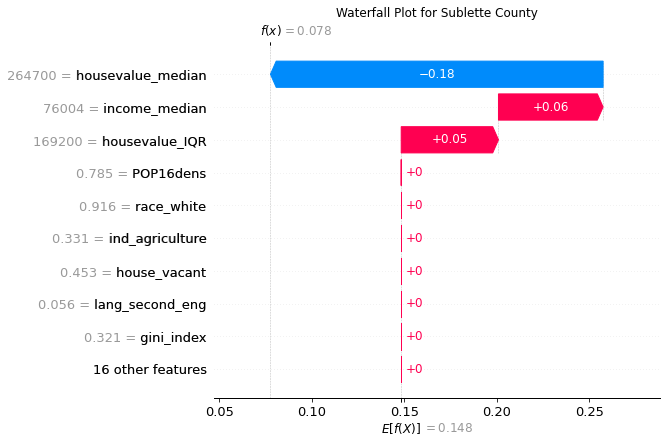

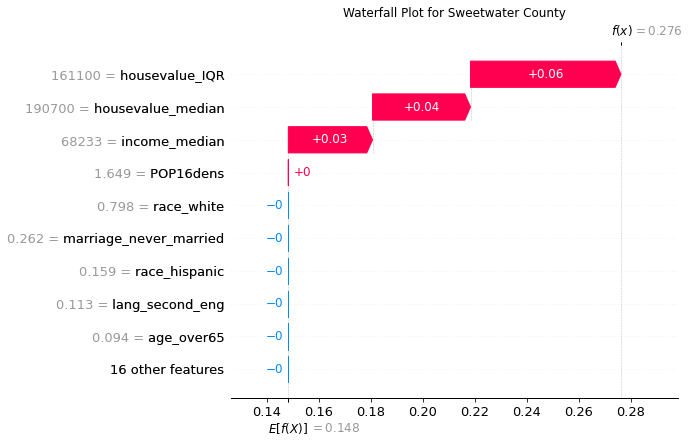

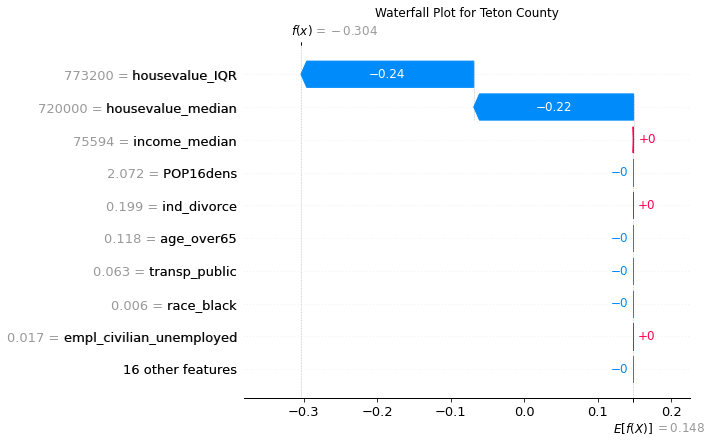

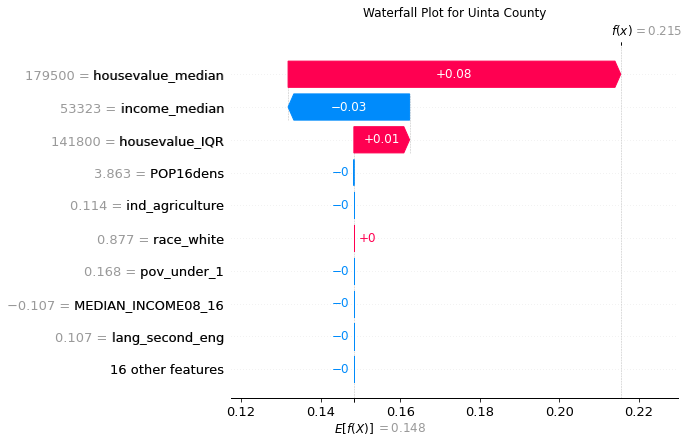

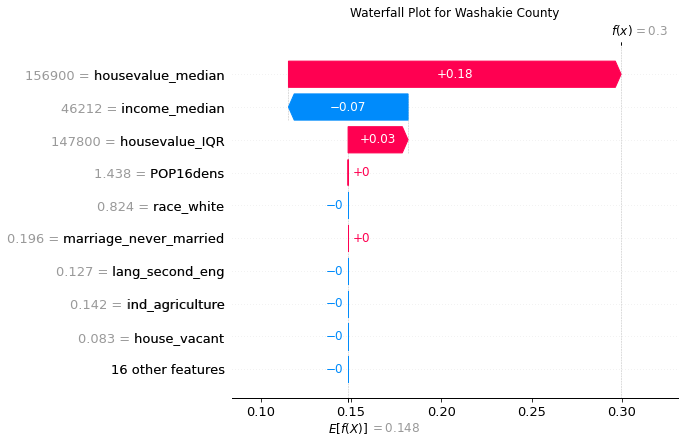

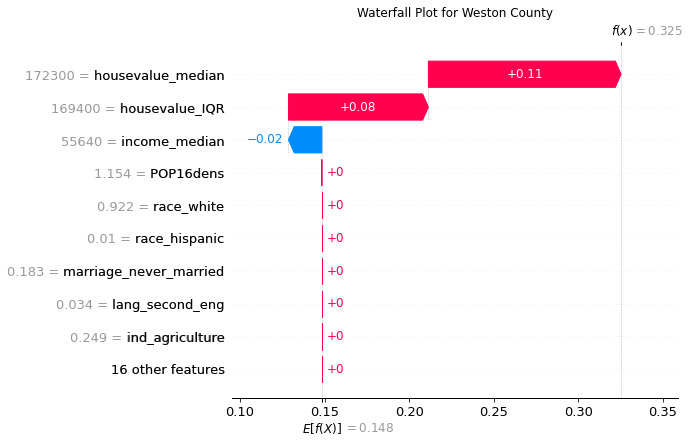

In [28]:
counties_df_dropped = counties_df.drop('COUNTY', axis = 1)
explainer = shap.explainers.Permutation(model_svr.predict, counties_df_dropped)
shap_values = explainer(counties_df_dropped, max_evals=65, error_bounds=True)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

shap.plots.waterfall(shap_values[0], show=False)

plt.title(f'Waterfall Plot for {counties_df.iloc[0, 0]}')

plt.show()
shap.plots.waterfall(shap_values[1], show=False)
plt.title(f'Waterfall Plot for {counties_df.iloc[1, 0]}')

plt.show()
shap.plots.waterfall(shap_values[2], show=False)
plt.title(f'Waterfall Plot for {counties_df.iloc[2, 0]}')

plt.show()
shap.plots.waterfall(shap_values[3], show=False)
plt.title(f'Waterfall Plot for {counties_df.iloc[3, 0]}')

plt.show()
shap.plots.waterfall(shap_values[4], show=False)
plt.title(f'Waterfall Plot for {counties_df.iloc[4, 0]}')

plt.show()
shap.plots.waterfall(shap_values[5], show=False)
plt.title(f'Waterfall Plot for {counties_df.iloc[5, 0]}')

plt.show()